In [70]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

In [98]:
test = pd.read_csv('testing.csv')
training = pd.read_csv('training.csv')
reducedSet = pd.read_csv('reducedSet.csv')

reducedColumns = reducedSet['x'].array

x_train = training.iloc[:,0:1881]
x_test = test.iloc[:,0:1881]

x_train_reduced = training[reducedColumns]
x_test_reduced = test[reducedColumns]

y_train = training['Class']
y_test = test['Class']

In [63]:
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.33331507  0.21051172  0.42820054 ...  0.47757372  0.16730452
  -0.00941143]]
[-0.03666239]


In [65]:
y_pred = lr.predict(x_test)

In [66]:
cm = confusion_matrix(y_test, y_pred)

tp = cm[0,0]
tn = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]

cm

array([[147,  42],
       [ 49, 280]])

In [68]:
accuracy = (tp + tn)/ (tp + tn + fn + fp)
sensitivity = tp/ (tp + fn) #Or TPR (True positive rate)
specificity = tn / (tn+fp)
fpr = 1 - specificity #False positive rate

print(accuracy)
print(sensitivity)
print(specificity)
print(fpr)

0.8243243243243243
0.75
0.8695652173913043
0.13043478260869568


In [40]:
predic_proba = lr.predict_proba(x_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  successful       0.75      0.78      0.76       189
unsuccessful       0.87      0.85      0.86       329

    accuracy                           0.82       518
   macro avg       0.81      0.81      0.81       518
weighted avg       0.83      0.82      0.82       518



In [42]:
y_test_binary = [1 if x=='successful' else 0 for x in y_test]
y_pred_binary = [1 if x=='successful' else 0 for x in y_pred]

In [43]:
lr_auc = roc_auc_score(y_test_binary, y_pred_binary)
print(lr_auc)

0.8144208037825059


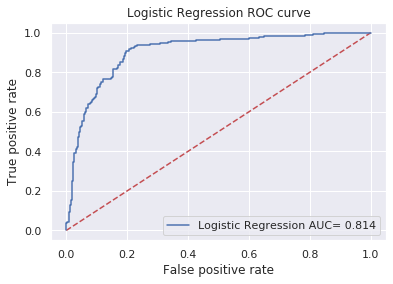

In [44]:
fpr, tpr, threshold = roc_curve(y_test_binary, predic_proba[:, 0])

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr, label='Logistic Regression AUC= %0.3f' % lr_auc)
plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate'),9.
plt.title('Logistic Regression ROC curve')
plt.show()

In [46]:
lr_reduced = LogisticRegression(solver='liblinear')
lr_reduced.fit(x_train_reduced,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
print(lr_reduced.coef_)
print(lr_reduced.intercept_)

[[ 2.15420210e-01  9.45211024e-02  2.59050269e-01  1.09936263e-01
  -2.48871548e-01 -1.49005635e+00  1.01829467e-03 -1.25323636e-01
   7.61284304e-03 -1.34349513e-01 -8.45391864e-02  5.43065197e-01
   2.11825696e-01 -1.83839986e-01  1.08005558e-01  1.53828742e-03
   6.92718172e-01  1.86761680e-01  7.31054194e-02  2.34117917e-01
   3.58458026e-01  1.67967196e-01 -1.33949852e-01  2.90829449e-01
   4.53965017e-02  1.85931106e-01  1.15613016e-01 -1.76850423e-01
  -8.20689130e-02  1.62285104e-01 -4.30465354e-01  3.58905983e-01
   1.04312383e-01 -4.88107408e-01  2.61902878e-02 -1.48656924e-01
  -1.82799376e-01 -6.87930023e-01 -3.70425891e-01 -5.78775953e-01
   3.39735108e-01  2.85113329e-01 -3.66061480e-01  3.55441528e-01
   3.46392697e-01 -4.07168148e-01  1.68220150e-01  3.26558877e-01
  -1.65379329e-01 -2.64181377e-01 -2.91994162e-01  9.24680329e-02
   3.23395085e-02  1.27467966e-01 -4.62341242e-01 -2.48640057e-01
   3.11667454e-01 -9.61973184e-03 -1.35634867e-01  1.07665703e-01
   3.03749

In [48]:
y_pred_reduced = lr_reduced.predict(x_test_reduced)

In [49]:
cm_reduced = confusion_matrix(y_test, y_pred_reduced)

tp_reduced = cm_reduced[0,0]
tn_reduced = cm_reduced[1,1]
fn_reduced = cm_reduced[1,0]
fp_reduced = cm_reduced[0,1]

cm_reduced

array([[150,  39],
       [ 46, 283]])

In [69]:
accuracy_reduced = (tp_reduced + tn_reduced)/ (tp_reduced + tn_reduced + fn_reduced + fp_reduced)
sensitivity_reduced = tp_reduced/ (tp_reduced + fn_reduced) #Or TPR (True positive rate)
specificity_reduced = tn_reduced / (tn_reduced+fp_reduced)
fpr_reduced = 1 - specificity_reduced #False positive rate

print(accuracy_reduced)
print(sensitivity_reduced)
print(specificity_reduced)
print(fpr_reduced)

0.8359073359073359
0.7653061224489796
0.8788819875776398
0.1211180124223602


In [51]:
predic_proba_reduced = lr_reduced.predict_proba(x_test_reduced)

In [52]:
print(classification_report(y_test, y_pred_reduced))

              precision    recall  f1-score   support

  successful       0.77      0.79      0.78       189
unsuccessful       0.88      0.86      0.87       329

    accuracy                           0.84       518
   macro avg       0.82      0.83      0.82       518
weighted avg       0.84      0.84      0.84       518



In [53]:
y_test_binary = [1 if x=='successful' else 0 for x in y_test]
y_pred_binary_reduced = [1 if x=='successful' else 0 for x in y_pred_reduced]

In [54]:
lr_auc_reduced = roc_auc_score(y_test_binary, y_pred_binary_reduced)
print(lr_auc_reduced)

0.8269165822357312


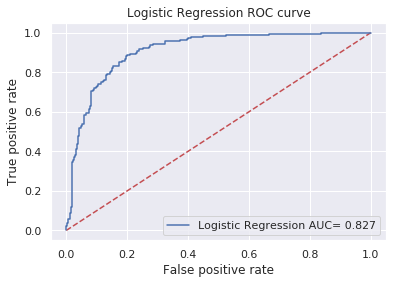

In [55]:
fpr_reduced, tpr_reduced, threshold_reduced = roc_curve(y_test_binary, predic_proba_reduced[:, 0])

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr_reduced,tpr_reduced, label='Logistic Regression AUC= %0.3f' % lr_auc_reduced)
plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.show()